column : Index([u'Suburb', u'Address', u'Rooms', u'Type', u'Price', u'Method',
       u'SellerG', u'Date', u'Distance', u'Postcode', u'Bedroom2', u'Bathroom',
       u'Car', u'Landsize', u'BuildingArea', u'YearBuilt', u'CouncilArea',
       u'Lattitude', u'Longtitude', u'Regionname', u'Propertycount'],
      dtype='object')


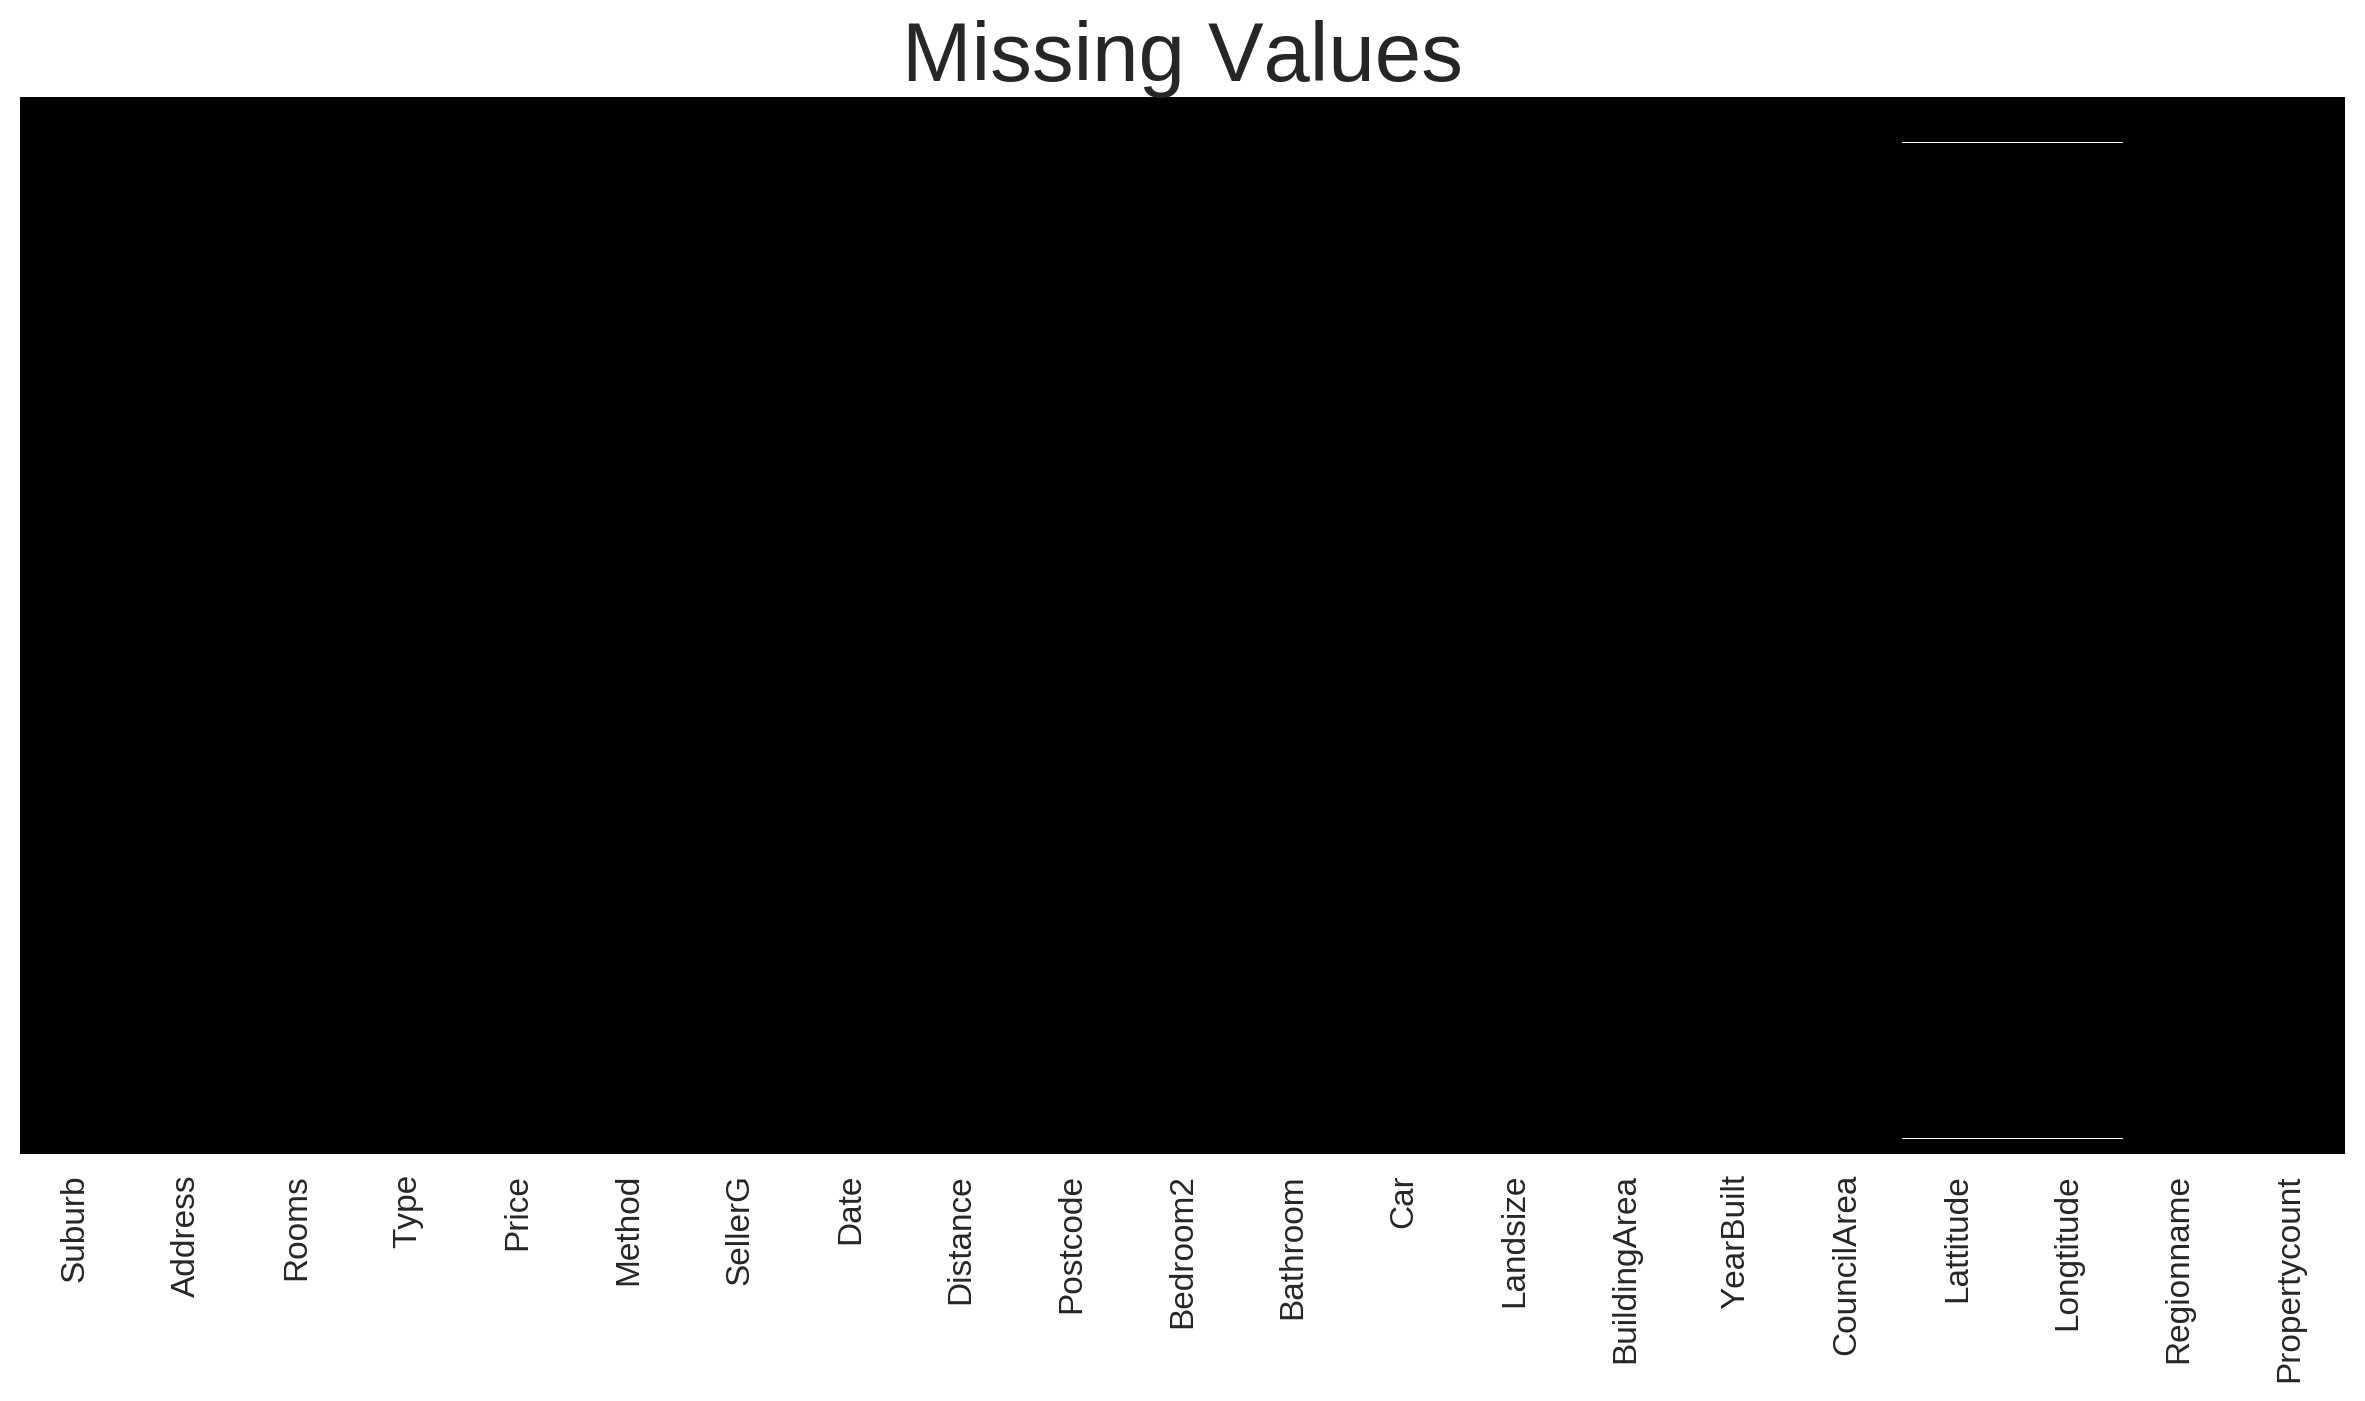

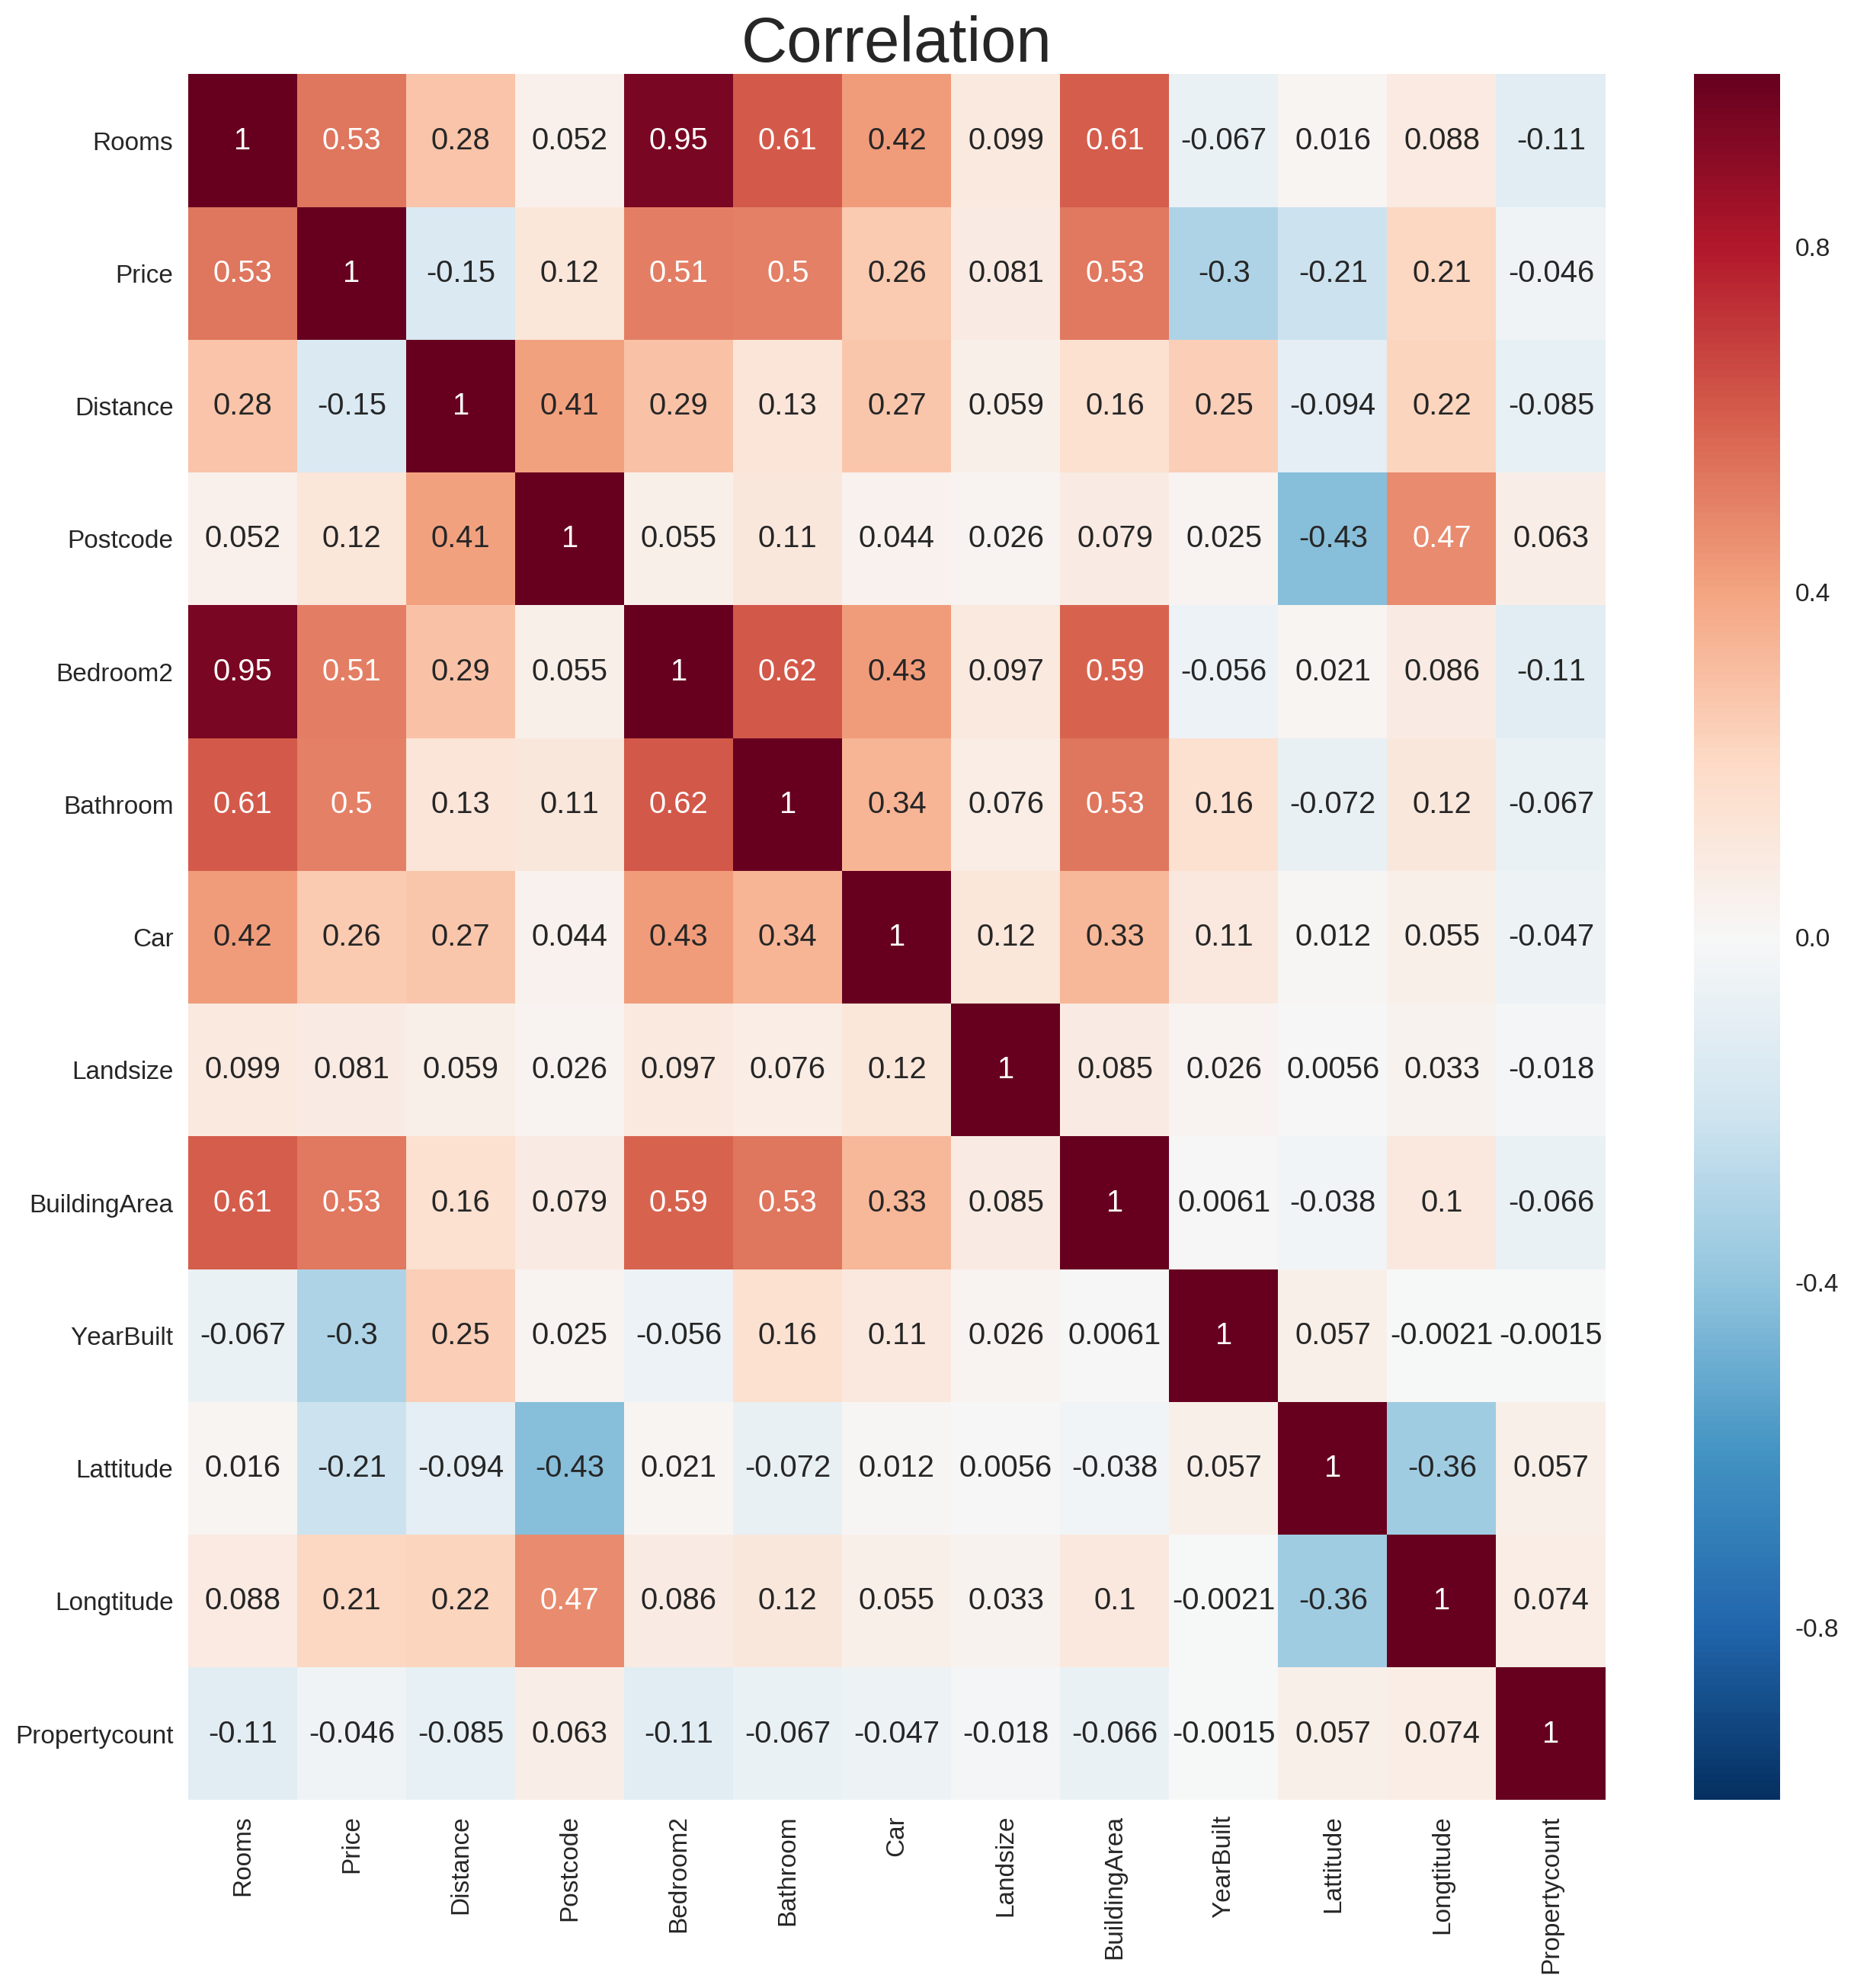

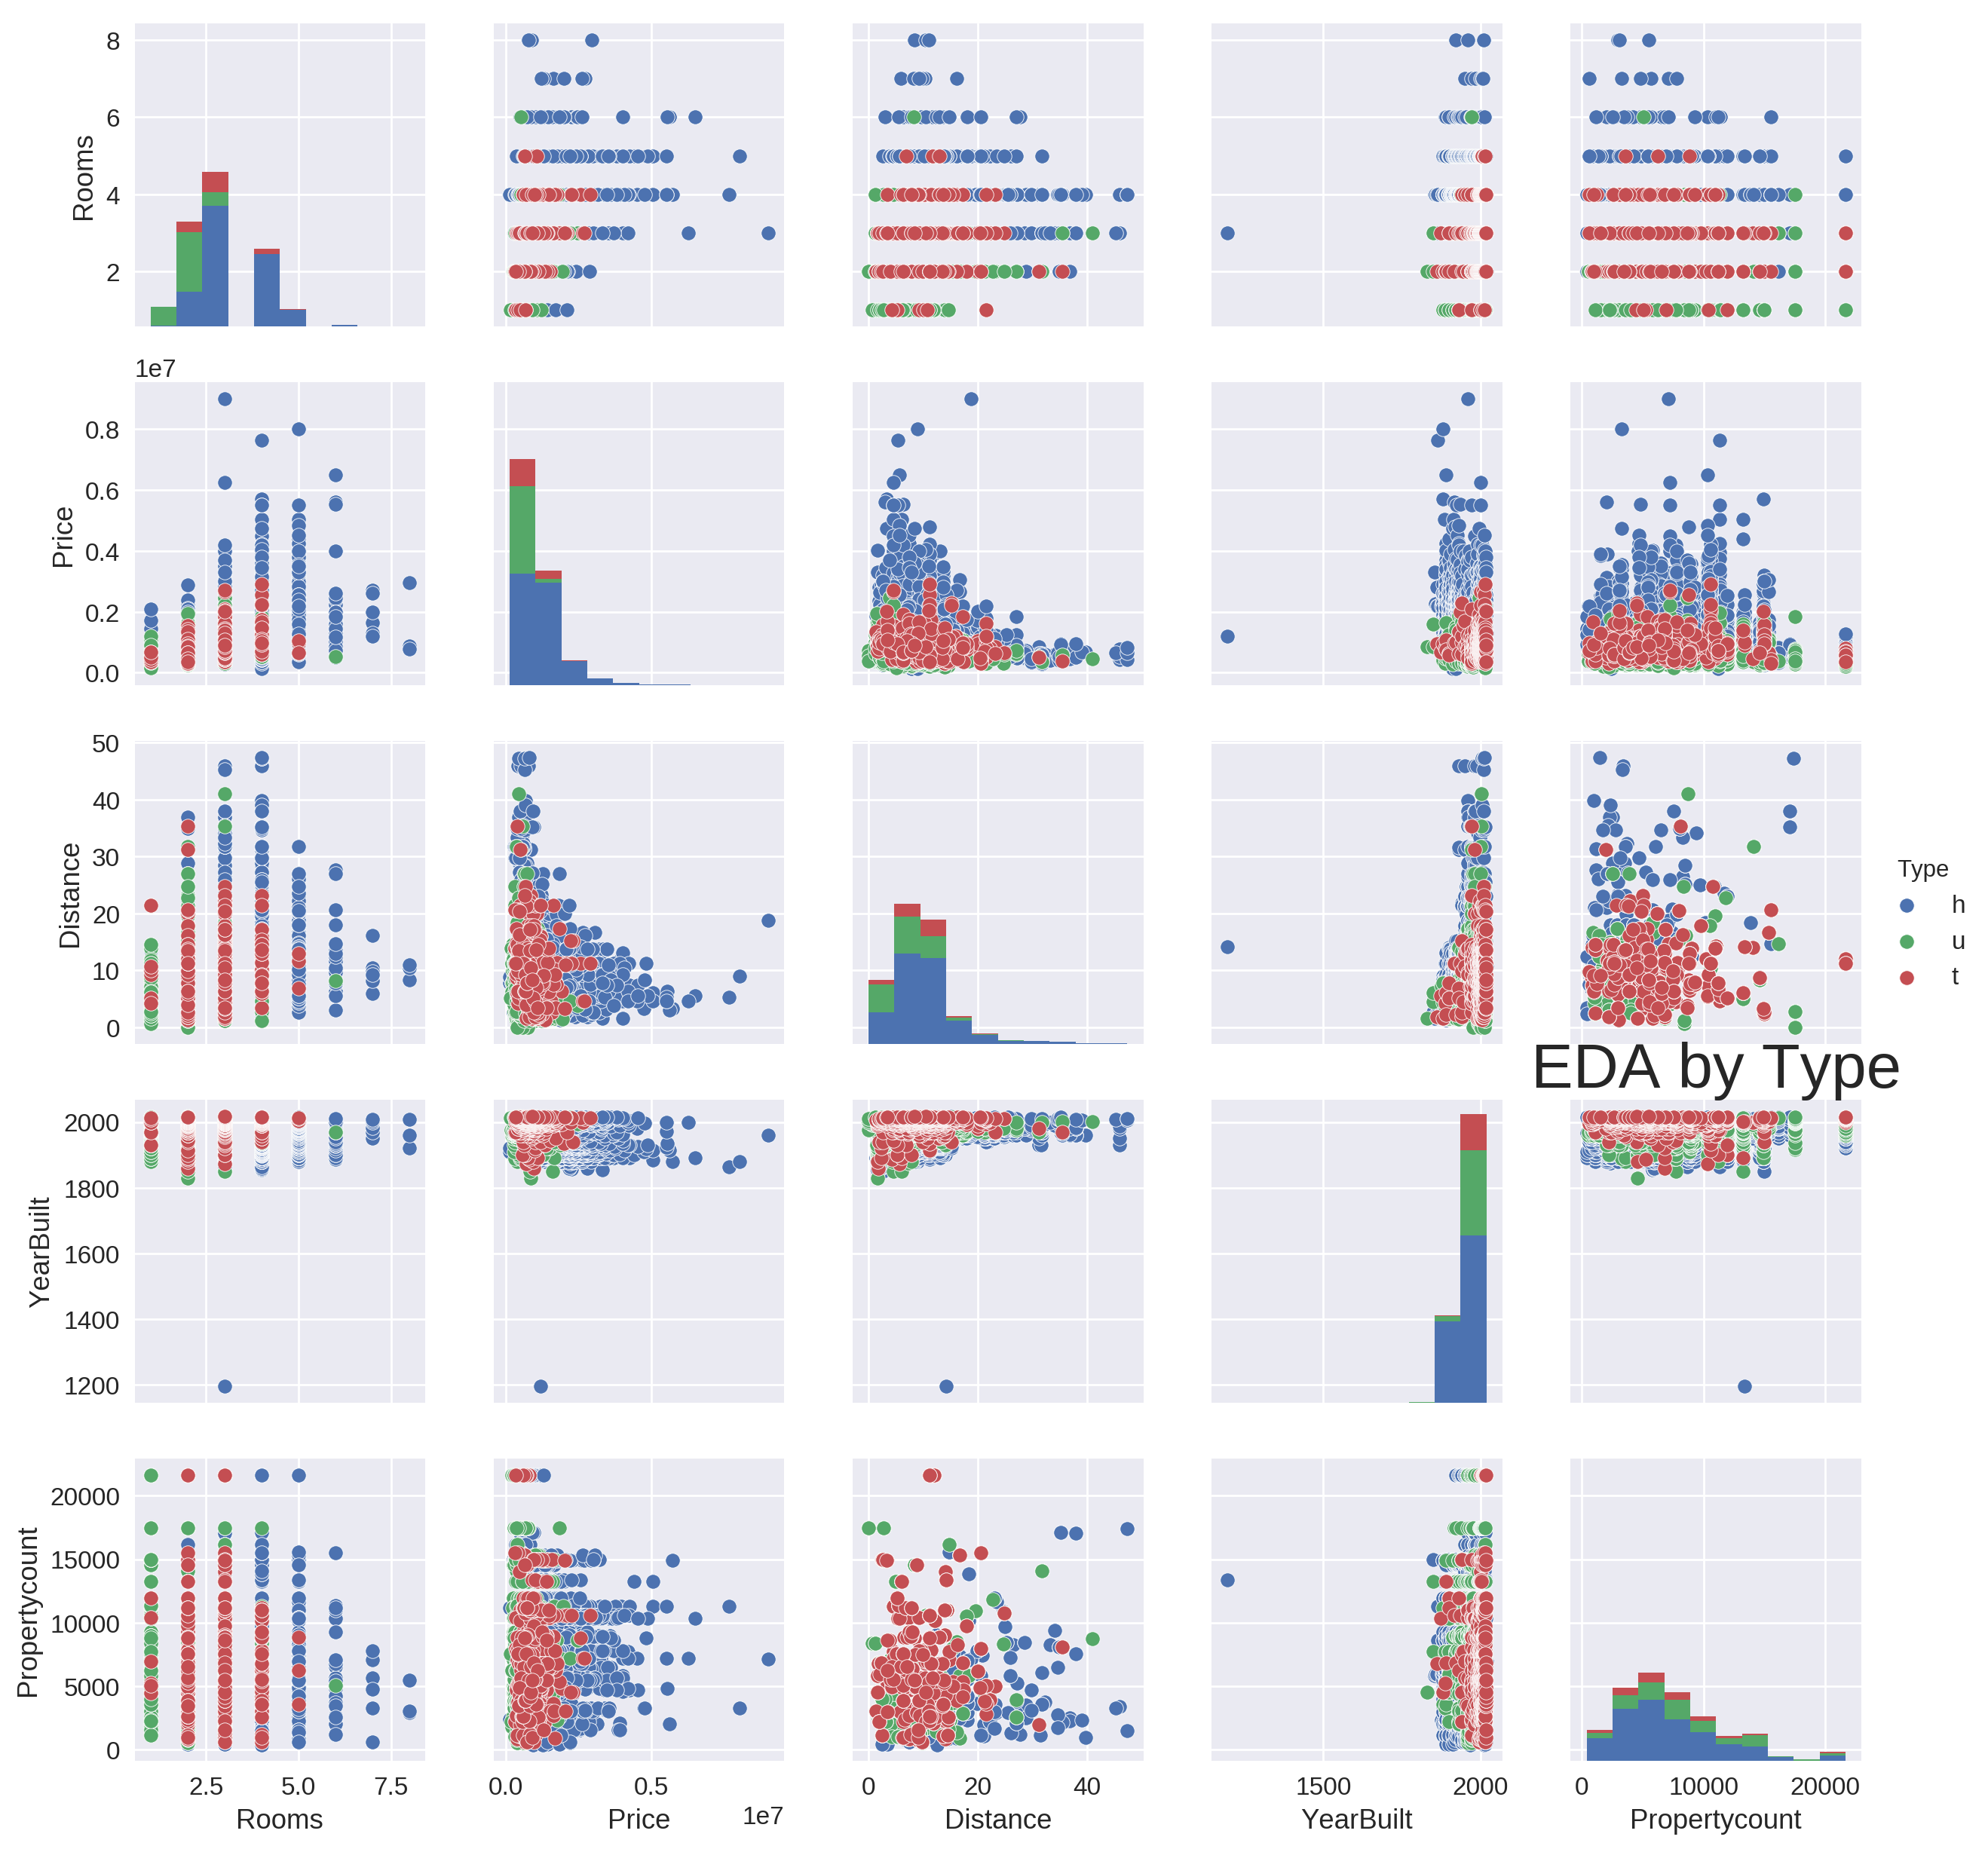

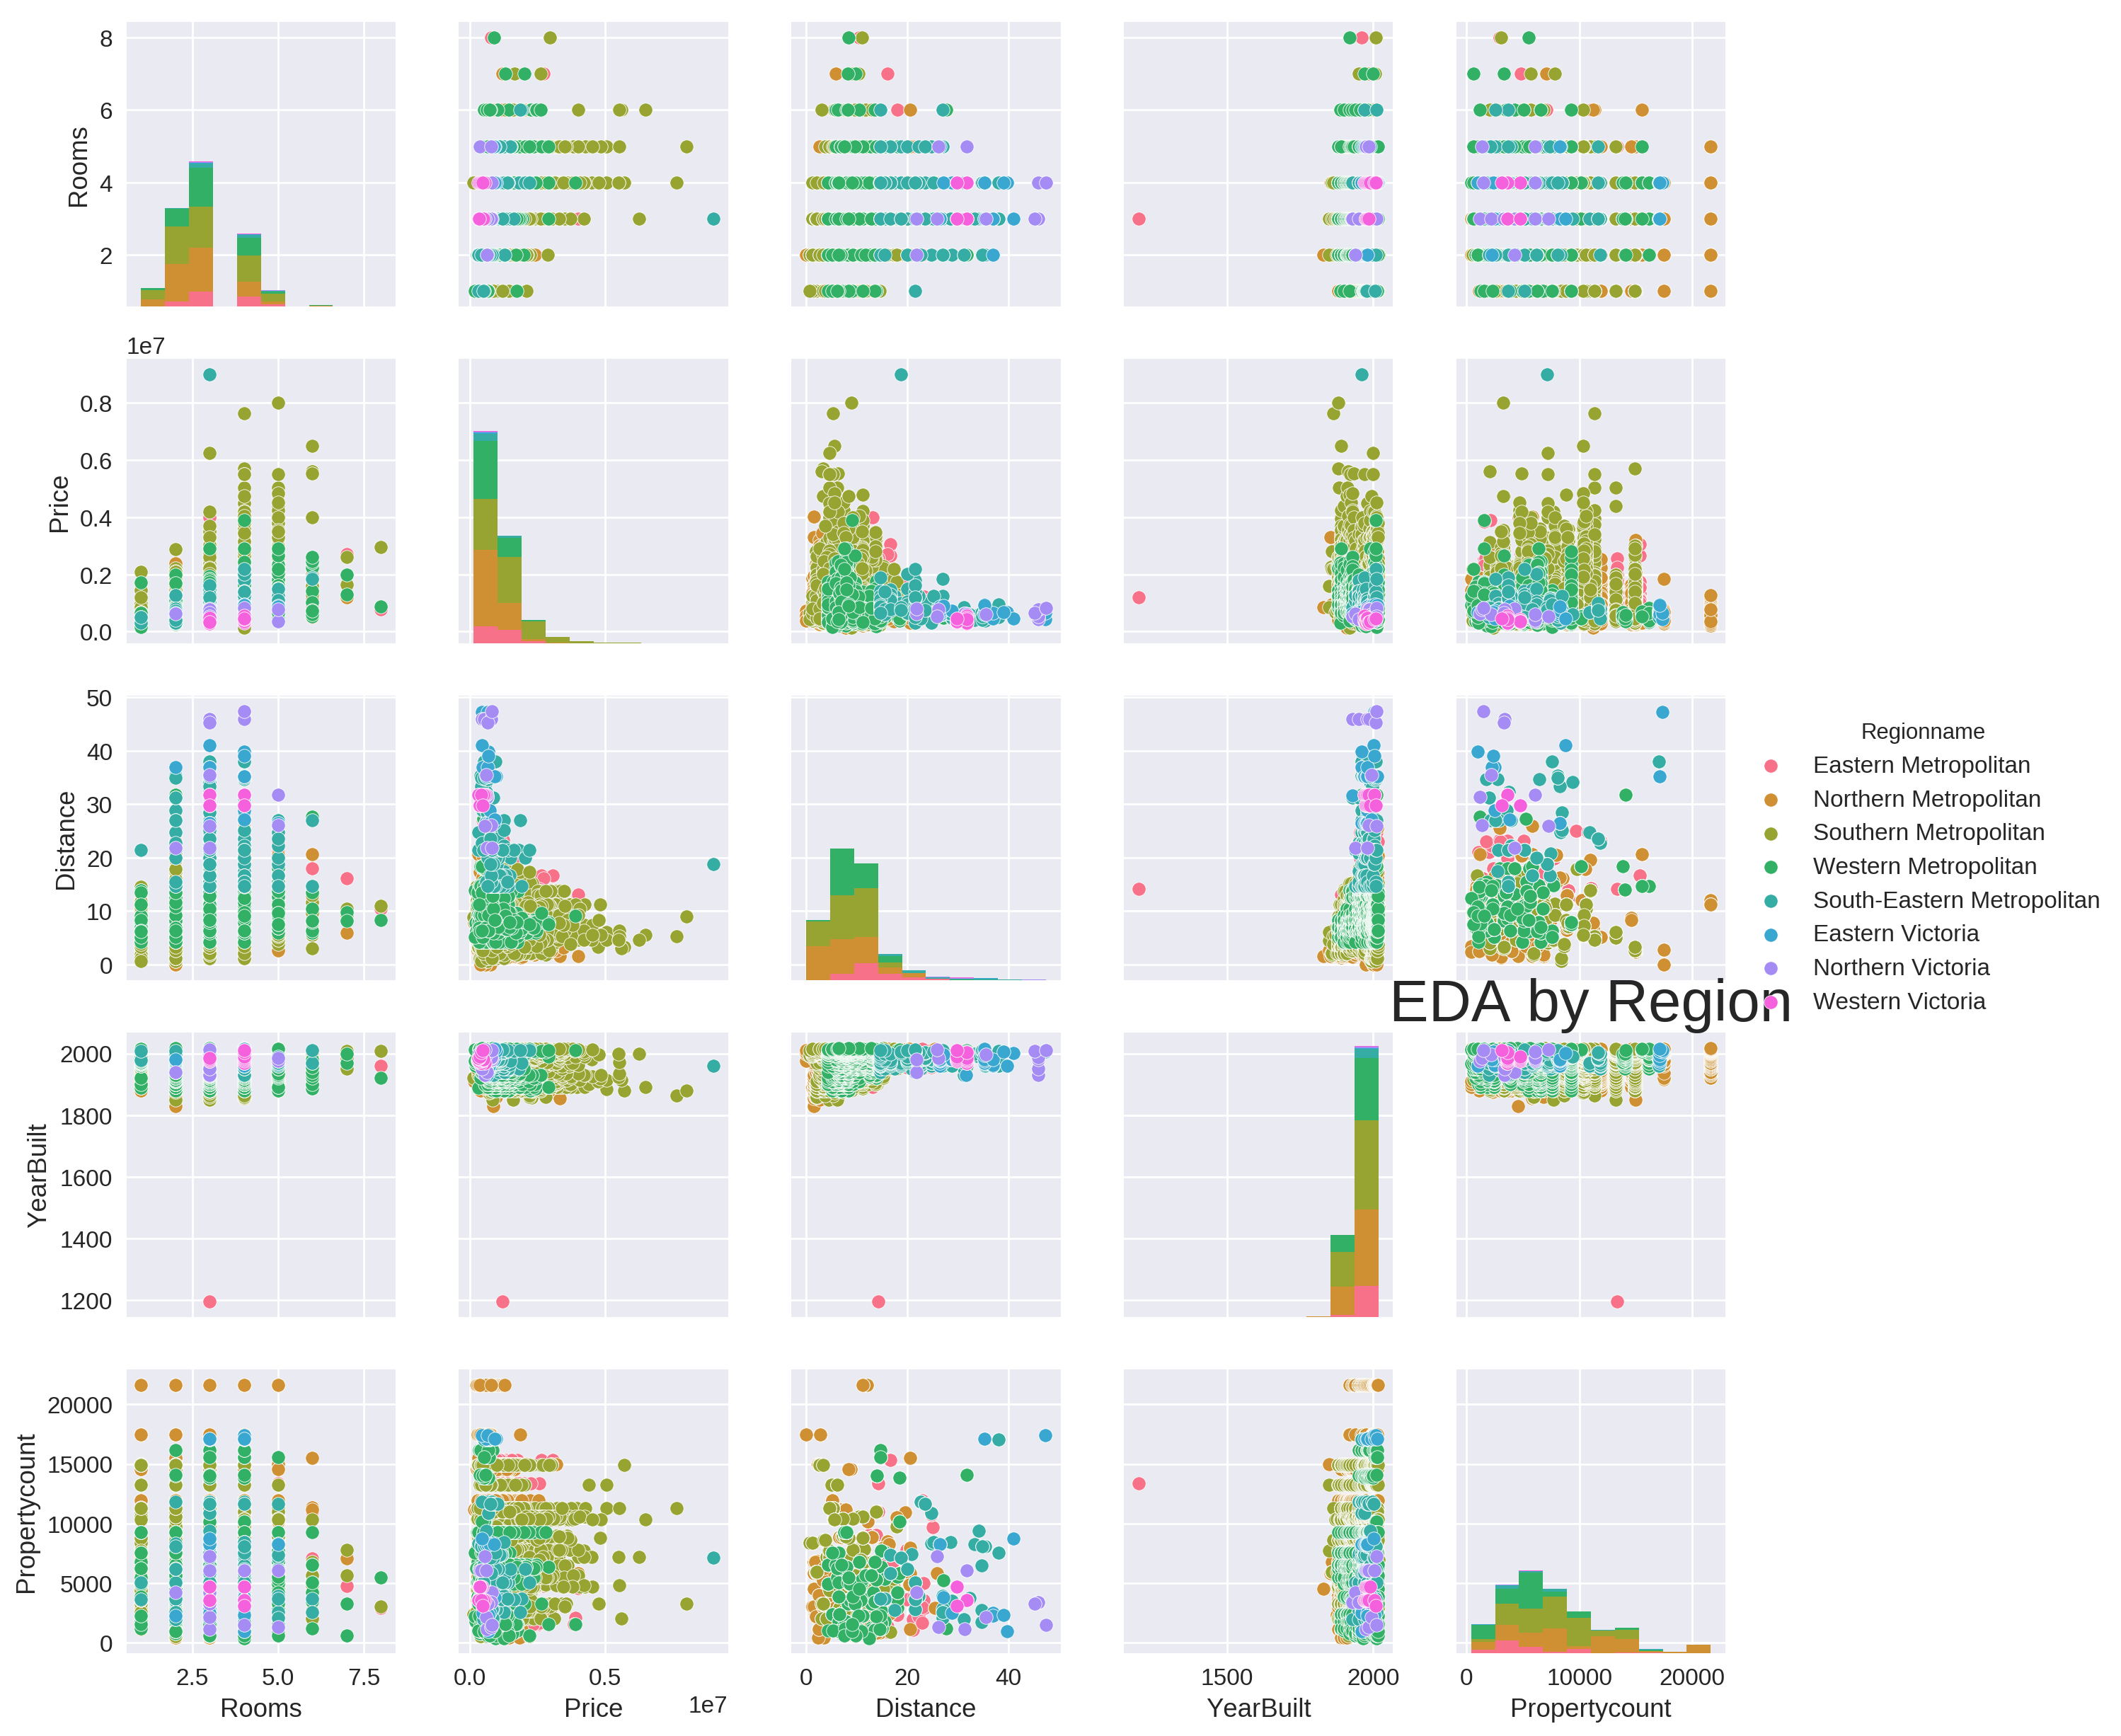

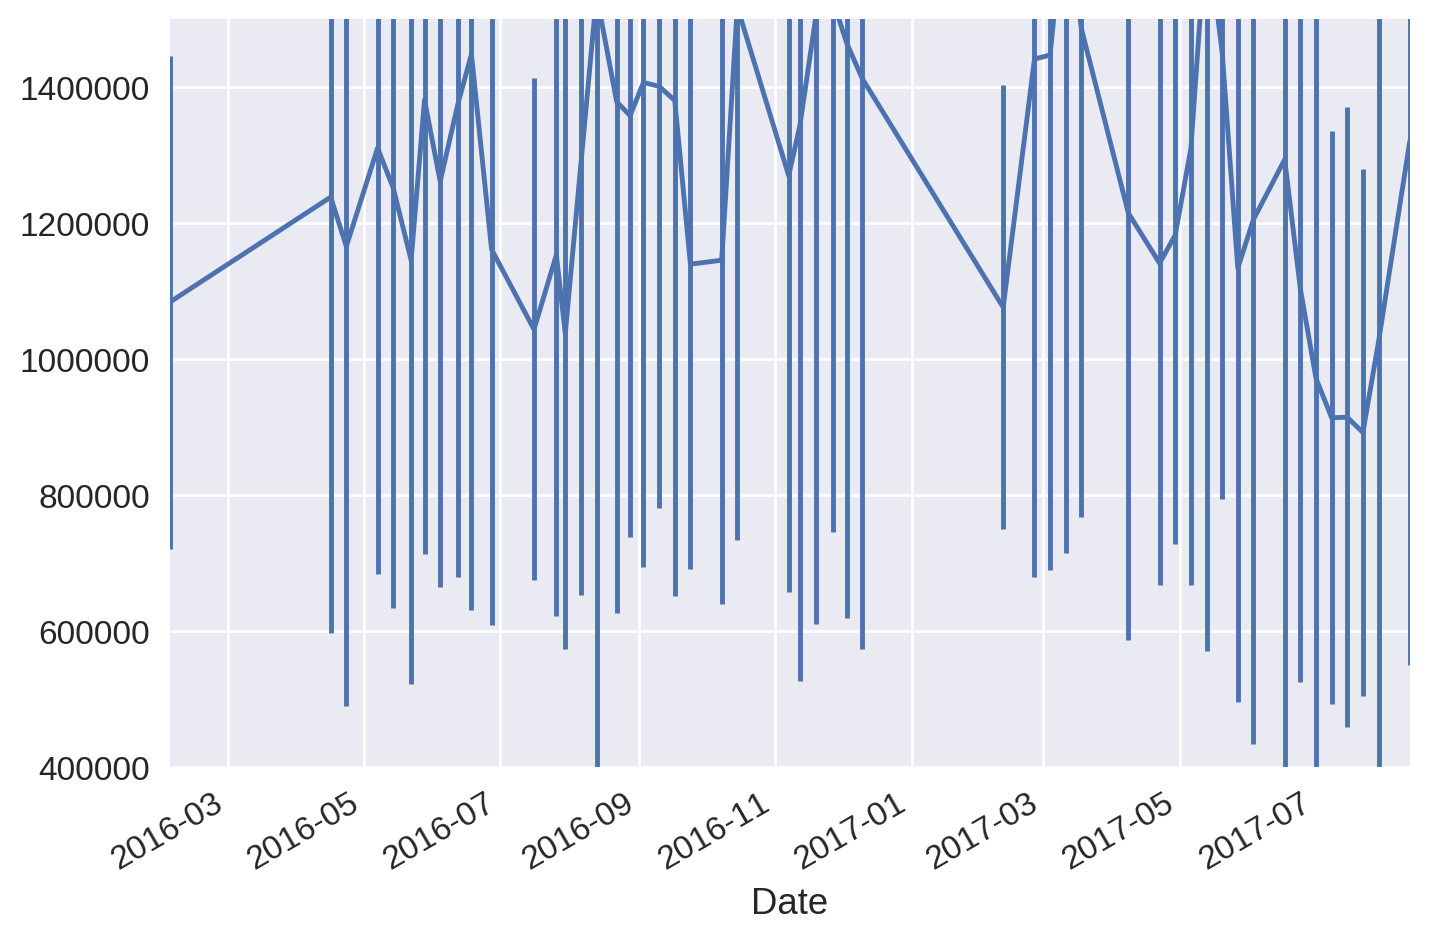

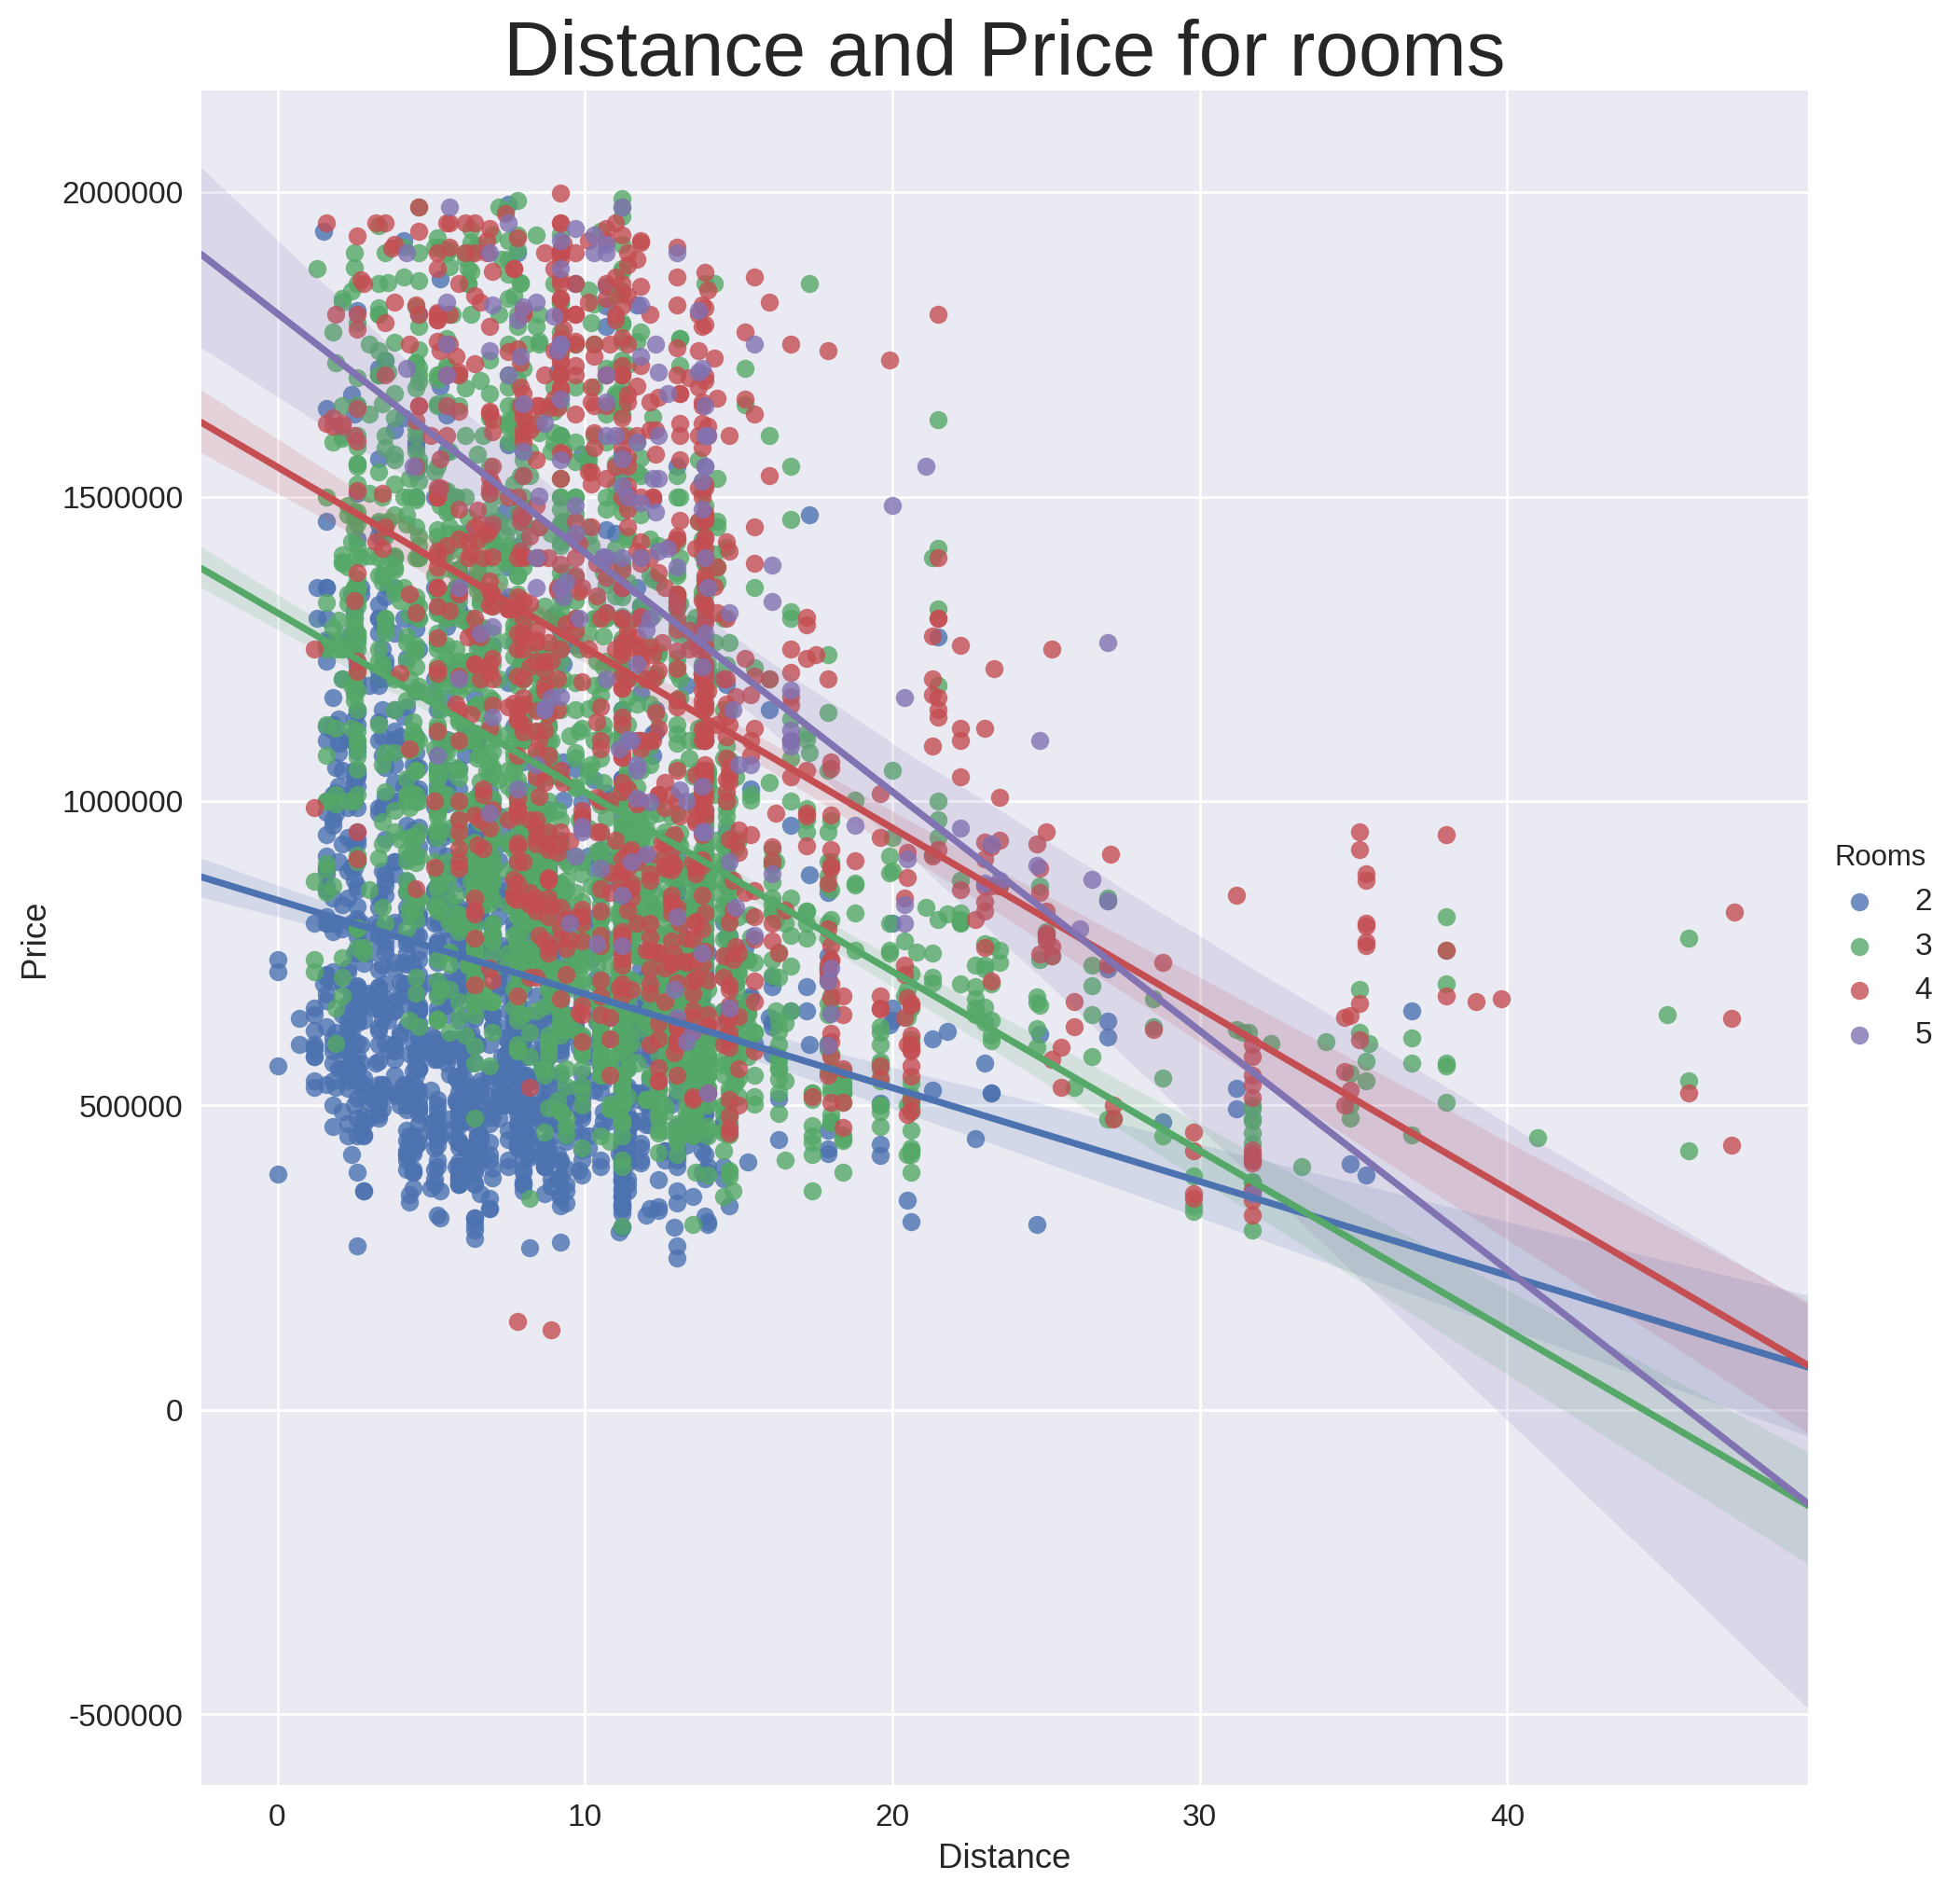

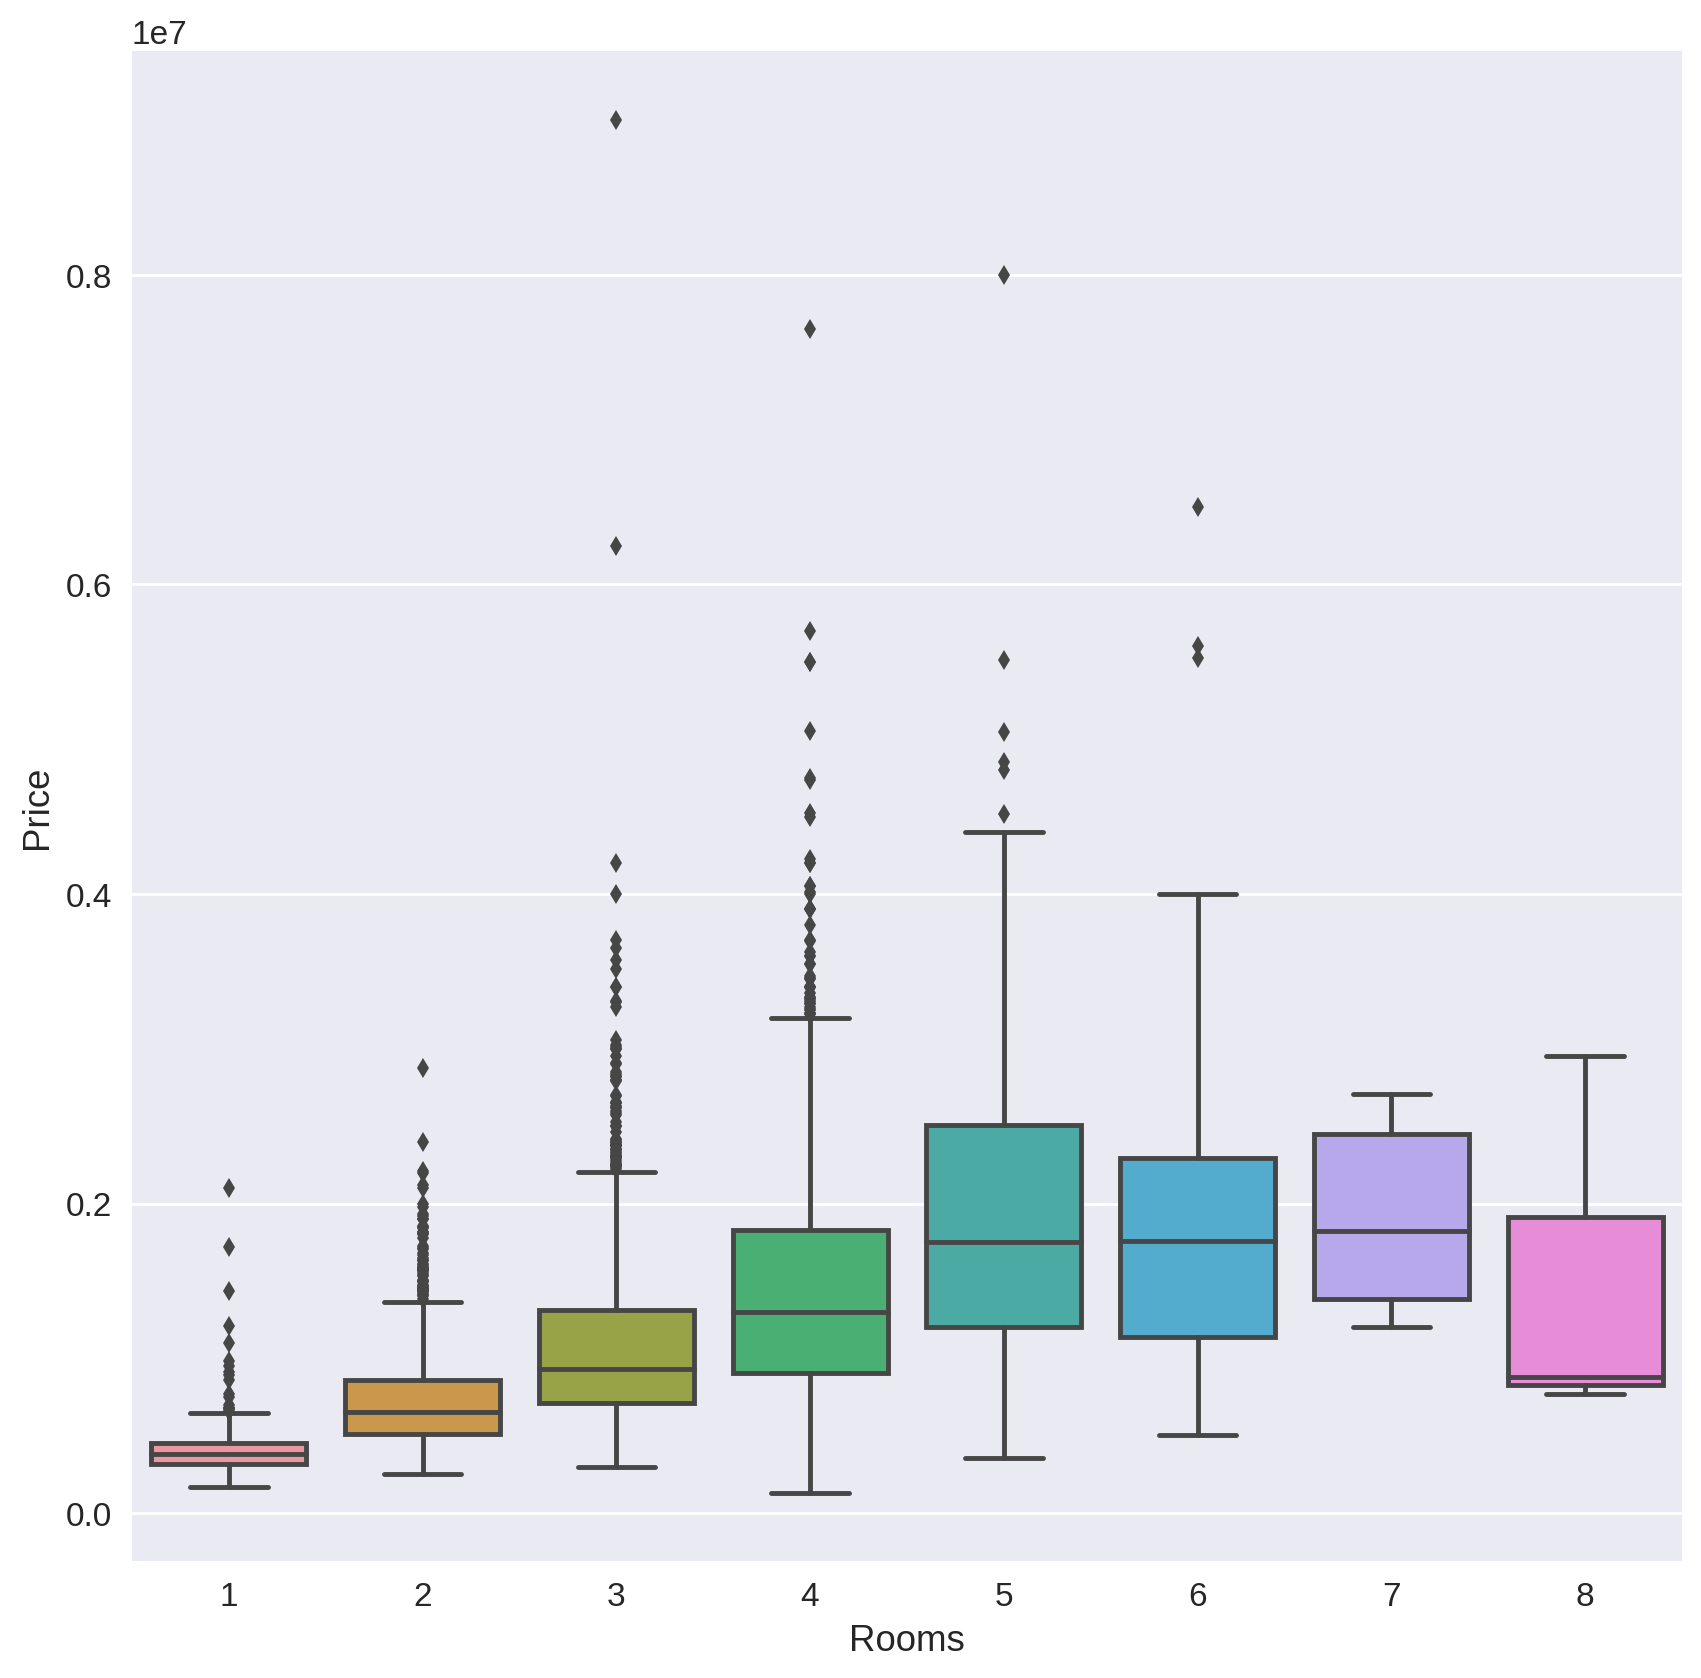

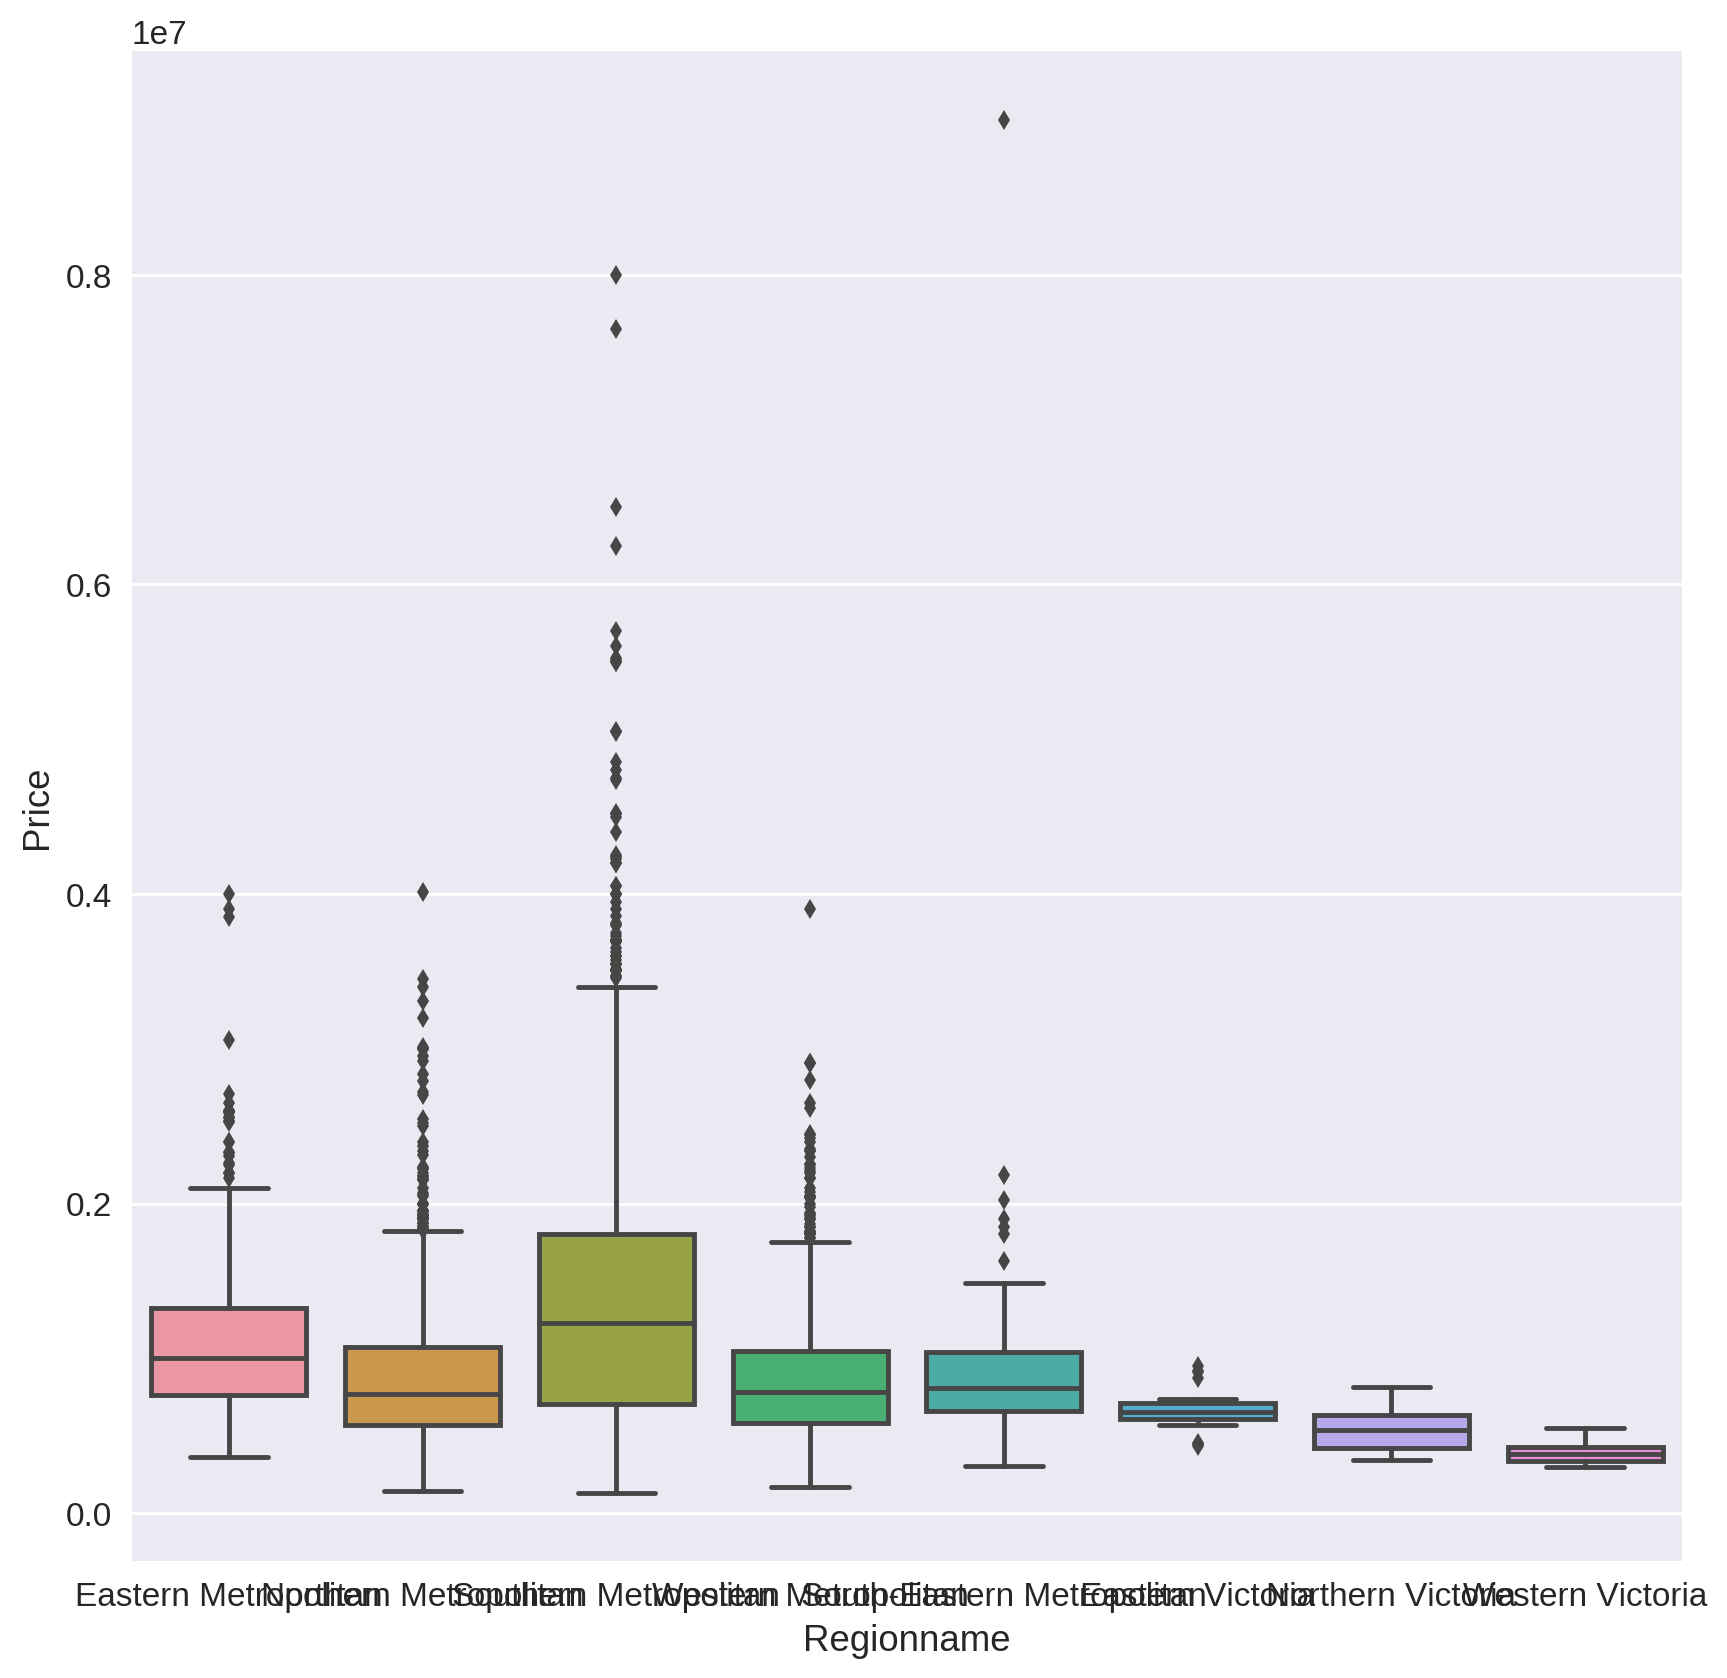

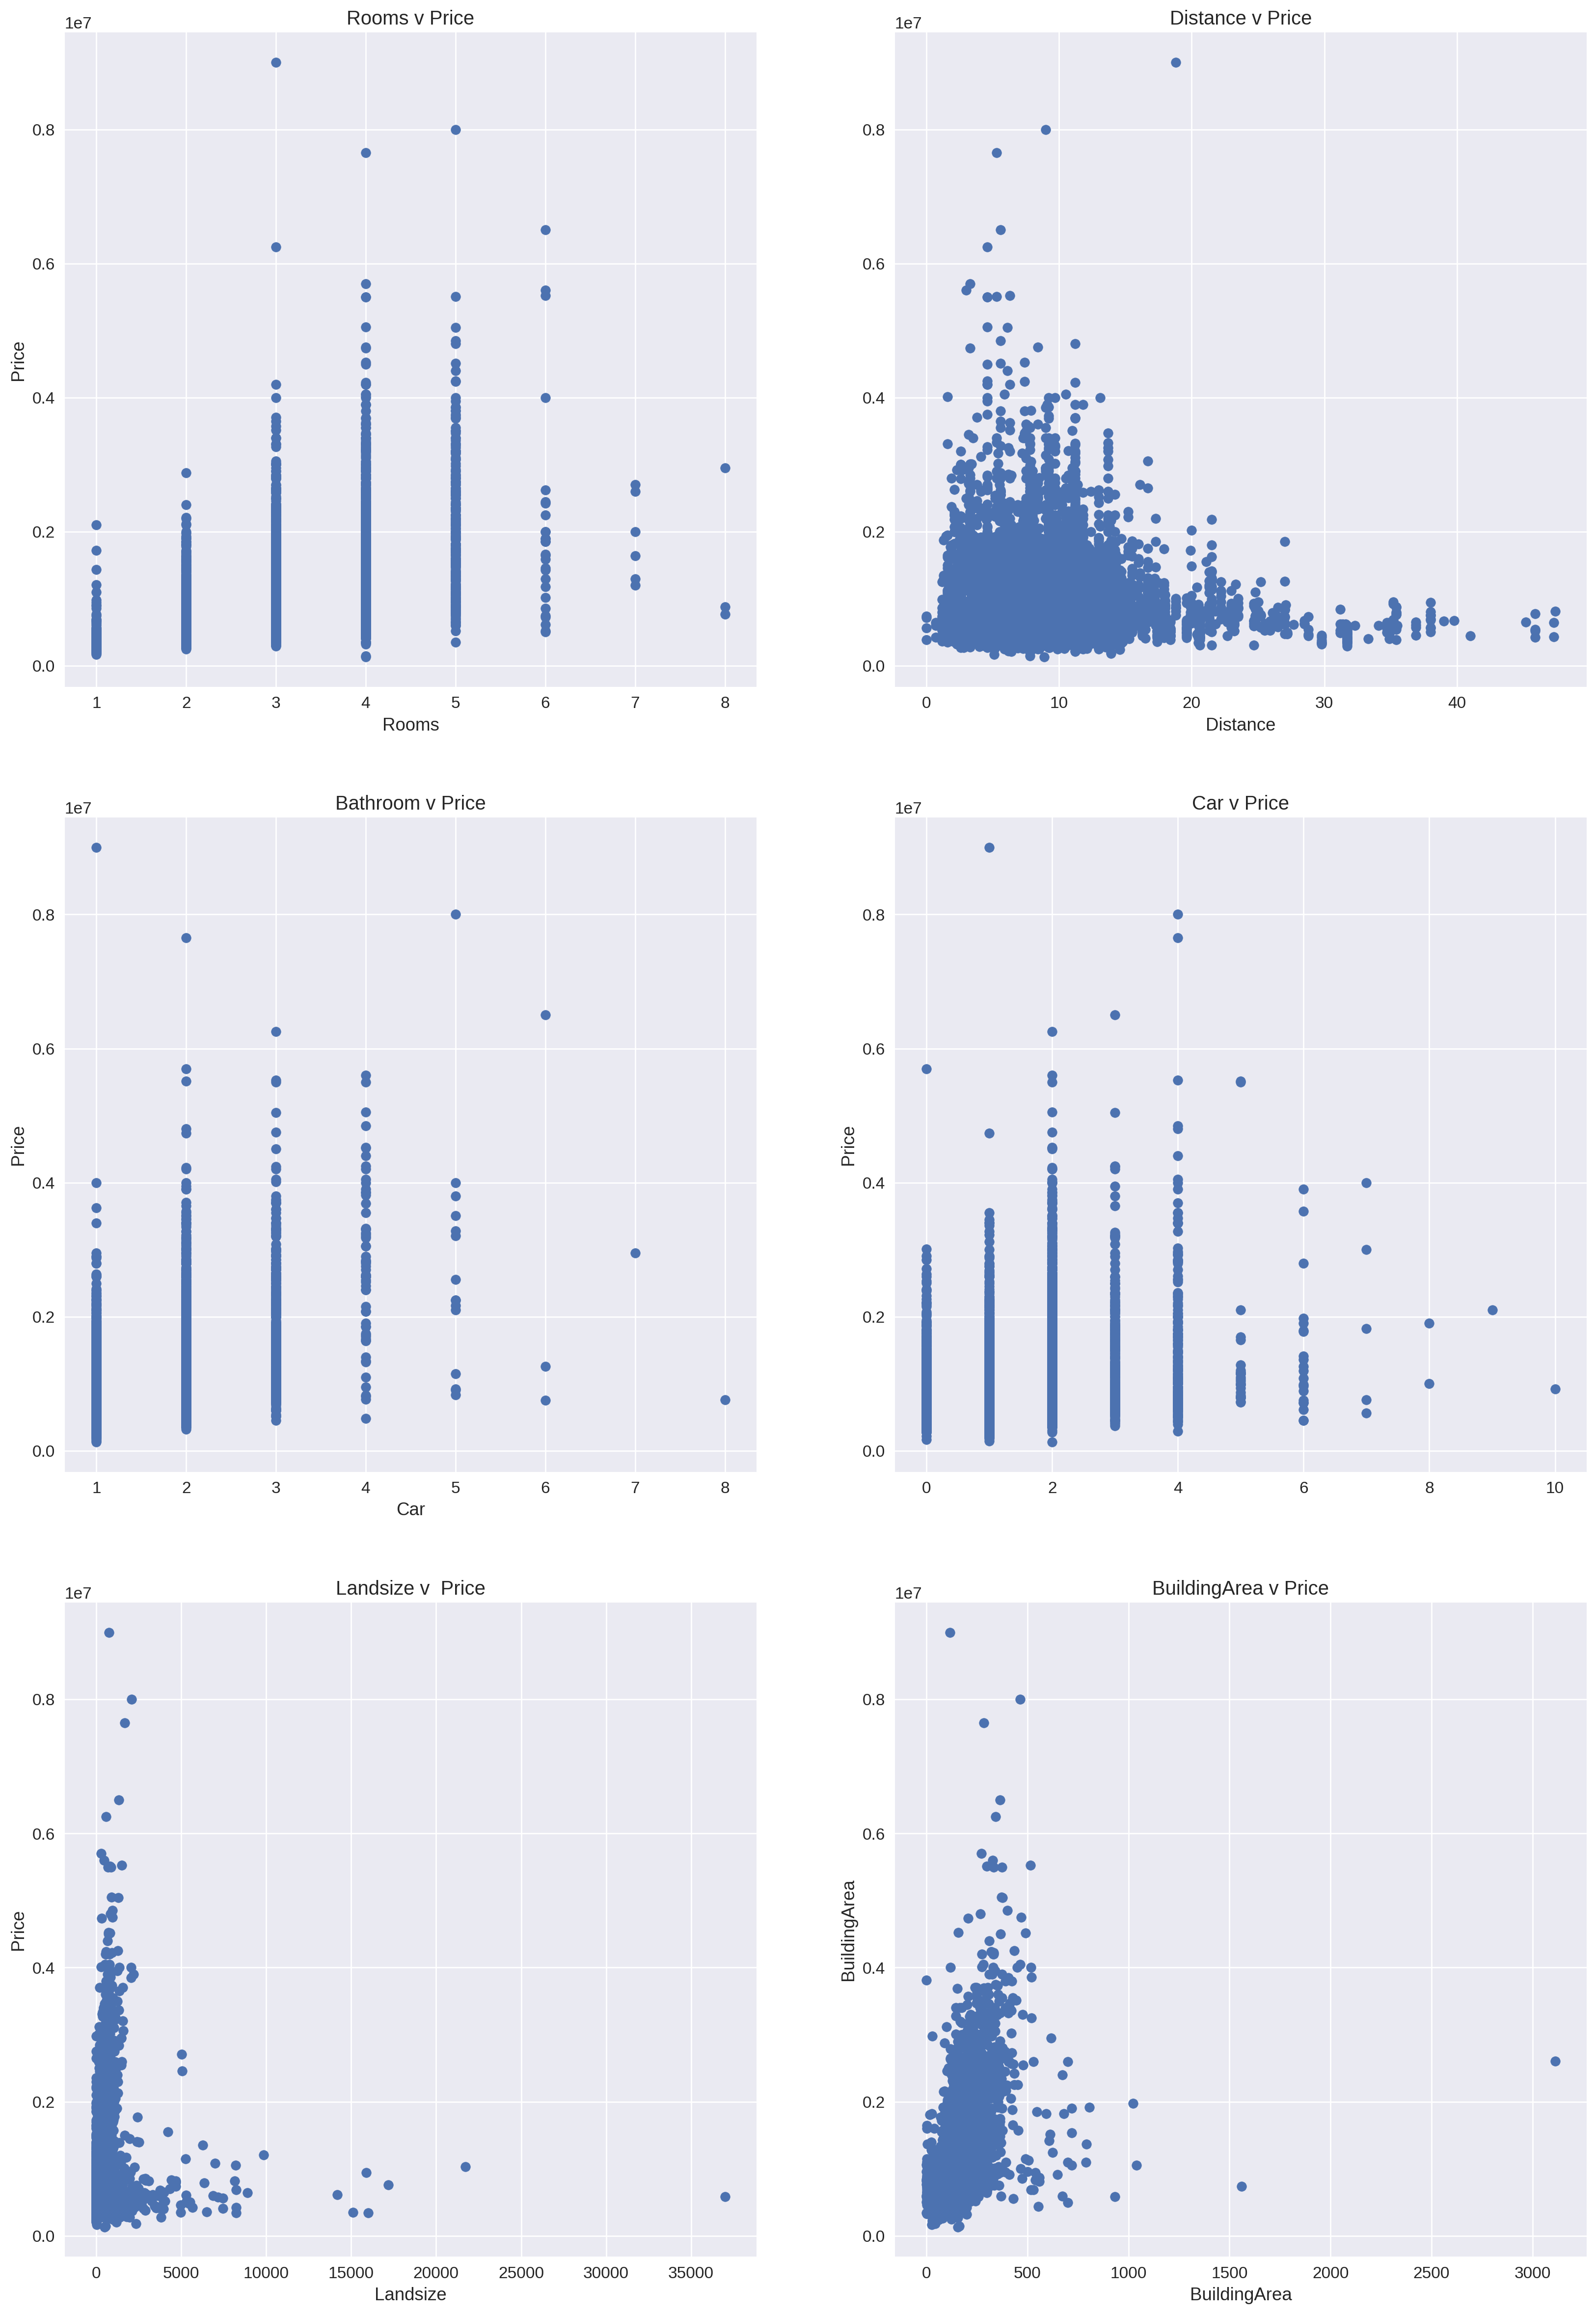

ValueError: x and y must be the same size

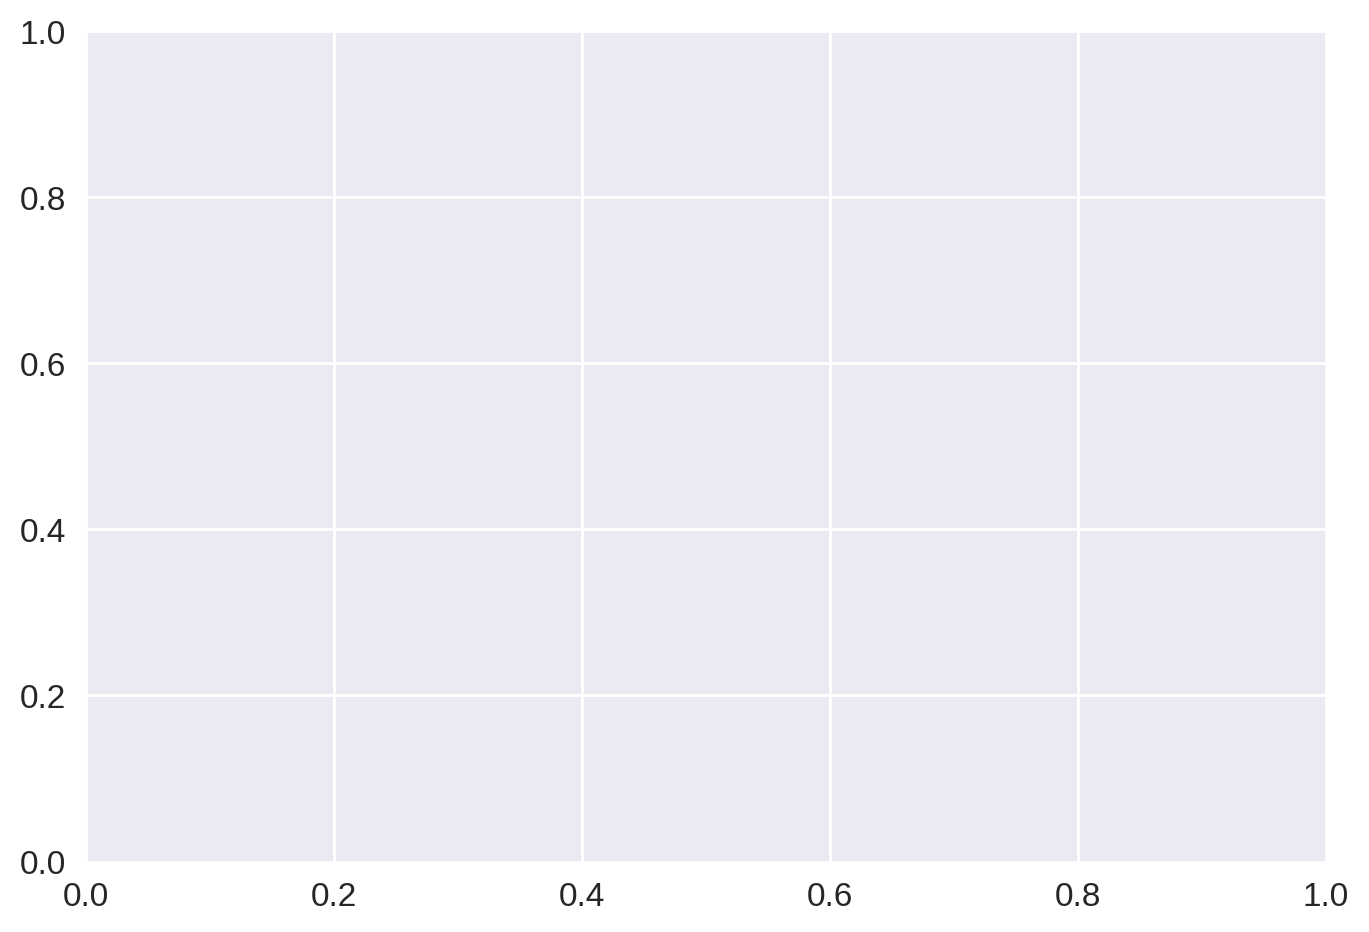

In [55]:
## Daeun Go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

################################################################################
##Data loading##################################################################
################################################################################
df1 = pd.read_csv('/home/dockeruser/df/Melbourne_housing_extra_data-18-08-2017_FULL.csv')
#print(df1)

##Show dataframe
k = df1.keys()
print('column :', k)

dataframe = pd.DataFrame(df1, columns=k)
#print(df2)
###############################################################################
## DATA Exploration############################################################
###############################################################################
cols = ['Rooms', 'Type', 'Price', 'Distance', 'YearBuilt', 'Propertycount','Regionname']
#print('cols', df2[cols])

# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(dataframe.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.title('Missing Values', fontsize=30)
plt.show()
# Check number of missing values
dataframe.isnull().sum()
#Correlation for each variables
fig, ax = plt.subplots(figsize=(15,15)) 
sns.plt.title('Correlation', fontsize=30)
sns.heatmap(dataframe.corr(), annot=True)
#1st EDA by Type
sns.pairplot(df2[cols], hue='Type')
plt.title('EDA by Type', fontsize=30)
plt.show()
#2nd EDA by Regionname
sns.pairplot(df2[cols], hue='Regionname')
plt.title('EDA by Region', fontsize=30)
plt.show()
#Time series prices for checking any surprising event
dataframe["Date"] = pd.to_datetime(dataframe["Date"],dayfirst=True)
len(dataframe["Date"].unique())/4 ##4Q divided
var = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))
#Price distribution by region, type, and number of rooms
sns.lmplot("Distance","Price",dataframe[(dataframe["Rooms"]<=5) & 
                                         (dataframe["Rooms"]> 1) & 
                                        (dataframe["Price"]< 2000000)
                                       ].dropna(),hue="Rooms", size=10)
sns.plt.title('Distance and Price for rooms', fontsize=30)
#Room and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Rooms',y='Price',data=dataframe)
#Region and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Regionname',y='Price',data=dataframe)

#Scatter plots
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataframe, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataframe, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataframe, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataframe, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataframe, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataframe, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

plt.show()

## Descriptive Statistics
df2.describe()

## Linear Regression
# Create features variable 
X = dataframe[['Rooms', 'Distance', 'Car','YearBuilt', 'Propertycount']]

# Create target variable
y = dataframe['Price']
# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# scatter plot
plt.scatter(X_train, y_train, color="pink")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, y_pred, color="lightgreen")

plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.show()
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))


